<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        Autism
    </h2>
    </div>

**Description**

Welcome to Autism Prediction Challenge hosted by REVA Academy for Corporate Excellence, REVA University.


**Abstract**

Improve Autism Screening by creating predicting the likelihood of having this condition.

**About this dataset**

**What is Autism**

Autism, or autism spectrum disorder (ASD), refers to a broad range of conditions characterized by challenges with social skills, repetitive behaviors, speech and nonverbal communication.

**Causes and Challenges**

It is mostly influenced by a combination of genetic and environmental factors. Because autism is a spectrum disorder, each person with autism has a distinct set of strengths and challenges. The ways in which people with autism learn, think and problem-solve can range from highly skilled to severely challenged.
Research has made clear that high quality early intervention can improve learning, communication and social skills, as well as underlying brain development. Yet the diagnostic process can take several years.

**The Role of Machine Learning**

This dataset is composed of survey results for more than 700 people who filled an app form. There are labels portraying whether the person received a diagnosis of autism, allowing machine learning models to predict the likelihood of having autism, therefore allowing healthcare professionals prioritize their resources.

Columns

**ID** - ID of the patient

**A1_Score to A10_Score** - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

**age** - Age of the patient in years

**gender** - Gender of the patient

**ethnicity** - Ethnicity of the patient

**jaundice** - Whether the patient had jaundice at the time of birth

**autism** - Whether an immediate family member has been diagnosed with autism

**contry_of_res** - Country of residence of the patient

**used_app_before** - Whether the patient has undergone a screening test before

**result** - Score for AQ1-10 screening test

**age_desc** - Age of the patient

**relation** - Relation of patient who completed the test

**Class/ASD**- Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

<a id="1"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Importing Libraries</p>

In [1]:
# loading the Basic libraries

import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

<a id="2"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Reading Data</p>

In [2]:
df= pd.read_csv(r"D:\Project\autism kaggle\Autism_Prediction\train.csv")
df.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


<a id="4.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Shape of DataFrame</p>

In [3]:
#shape of the dataset
df.shape

(800, 22)

<a id="4.2"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Datatype of Each Feature</p>

In [4]:
#Datatypes of the dataset
pd.DataFrame(df.dtypes,
            columns=['Data Types'])

,Data Types
ID,int64
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64


<a id="6"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Checking for NaN values</p>

In [5]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


###### Here, from the above information we can predict that there is no null values

<a id="5"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Duplicated values in dataset</p>

In [6]:
#duplicated data in a datset
df[df.duplicated()]

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD


###### so, here we can say that there is no duplicated data as well

<a id="5"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Statistical information of data</p>

In [7]:
#description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


## Age

In [8]:
df['age'].value_counts()

age
38.172746    1
9.349183     1
26.412616    1
20.258796    1
61.860473    1
            ..
47.284149    1
11.029966    1
16.626307    1
33.123913    1
46.966113    1
Name: count, Length: 800, dtype: int64

<a id="4.2"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Distribution of Age</p>

<Axes: xlabel='age', ylabel='Density'>

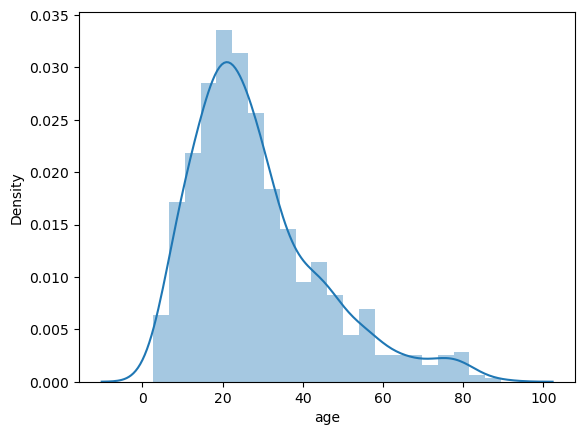

In [9]:
sns.distplot(df['age'],kde=True)

<a id="4.2"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Checking maximum and minumumof age</p>

In [10]:
print(f"Maximum age is data: {df['age'].max()}\n")

print(f"Minimum age is data: {df['age'].min()}")

Maximum age is data: 89.4617183

Minimum age is data: 2.718549681


<a id="7"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Checking unique values in Categorical feature</p>

In [17]:
for col in df.select_dtypes('O').columns:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')


-------------------------------
Column name: gender

Unique values:
['f' 'm']


-------------------------------
Column name: ethnicity

Unique values:
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


-------------------------------
Column name: jaundice

Unique values:
['no' 'yes']


-------------------------------
Column name: austim

Unique values:
['no' 'yes']


-------------------------------
Column name: contry_of_res

Unique values:
['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pak

 Here, we can see that the **ethnicity** and **relation** has some invalid values

<a id="7.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Replacing invalid value in ethnicity</p>

In [18]:
#replacing the invalid value i.e '?' with others.
df['ethnicity'] = df['ethnicity'].replace(to_replace='?',value='others')
df['ethnicity'].unique()

array(['others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

we need to replace the other with Others as it consist of small o and capital O in the others,and python is a case sensitive

In [19]:
df['ethnicity'] = df['ethnicity'].replace(to_replace='others',value='Others')
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

<a id="7.1"></a>
<p style="background-color:#84A9AC;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:20px 80px;">Replacing invalid value in relation with mode</p>

### Replacing the value in relation

In [20]:
df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])
df['relation'].unique()

array(['Self', 'Relative', 'Parent', 'Others', 'Health care professional'],
      dtype=object)

In [21]:
df['relation'].value_counts()

relation
Self                        749
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

<a id="7"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Visualization</p>

In [22]:
gender = df['gender'].value_counts()
gender

gender
m    530
f    270
Name: count, dtype: int64

In [23]:
percent_gender  = ((gender )/ (df['gender'].count()))*100
percent_gender

gender
m    66.25
f    33.75
Name: count, dtype: float64

## Counts of Male and Female

In [24]:
fig = px.pie(df, names = "gender",
             title = "<b>Counts of Male and Female</b>",
             hole = 0.5, template = "plotly_dark",
             color_discrete_sequence=[ "#636EFA"])
fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

### 66.3% of the male and 33.8% are female are present in the dataset

In [25]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

## Autism Spectrum Disorder Counts

In [26]:
import plotly.express as px

fig = px.pie(df, names="Class/ASD",
             title="<b>Autism Spectrum Disorder Counts</b>",
             template="plotly_dark",
             color_discrete_sequence=[ "#636EFA"])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width=1.5)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15)

fig.show()


### 20.1% people are ASD patient in dataset

## Average age by gender

In [29]:
import plotly.express as px

# Assuming df.groupby('gender').agg({'age':'mean'}) is stored in grouped_df
gender_df = df.groupby('gender').agg({'age': 'mean'}).reset_index()

fig = px.bar(gender_df, 
             x="gender", 
             y="age", 
             template="seaborn",
             labels={"gender": "Gender", "age": "Average Age"},
             color_discrete_sequence=["#84b1b5"])

fig.update_layout(title="Average Age by Gender")
fig.show()

## Gender Count of ASD Patients

In [36]:
import plotly.express as px

# Filter the DataFrame
filtered_df = df[df['Class/ASD'] == 1]

if filtered_df.empty:
    print("No data found for Class/ASD = 1")
else:
    # Prepare data for plotting
    gender_counts = filtered_df['gender'].value_counts().reset_index()
    gender_counts.columns = ['Gender', 'Counts']

    # Create the bar plot
    fig = px.bar(gender_counts, 
                 x="Gender", 
                 y="Counts", 
                 template="seaborn", 
                 color_discrete_sequence=["#84b1b5"], 
                 labels={"Gender": "Gender", "Counts": "Counts"})

    fig.update_layout(title="<b>Gender Count of ASD Patients</b>\n", title_font=dict(size=20), width=900)
    fig.show()


In [37]:
asd_patients_country_wise = pd.DataFrame(df[df['Class/ASD'] == 1]['contry_of_res'].value_counts()).rename({"contry_of_res":"ASD_Patient_Counts"}, axis = 1)

In [38]:
asd_patients_country_wise.style.bar(color="#84A9AC") 

,count
contry_of_res,
United States,69
United Kingdom,28
Canada,9
Australia,7
Afghanistan,3
Kazakhstan,3
France,3
India,3
Jordan,3


In [39]:
asd_patients_country_wise.index

Index(['United States', 'United Kingdom', 'Canada', 'Australia', 'Afghanistan',
       'Kazakhstan', 'France', 'India', 'Jordan', 'Armenia', 'Viet Nam',
       'Aruba', 'Spain', 'Netherlands', 'Oman', 'Pakistan', 'Ireland',
       'Azerbaijan', 'Bahamas', 'New Zealand', 'Austria', 'Ethiopia', 'Italy',
       'Bolivia', 'Brazil', 'Niger', 'Saudi Arabia', 'Cyprus', 'Burundi',
       'Malaysia', 'Ukraine', 'Sri Lanka', 'Iran'],
      dtype='object', name='contry_of_res')

In [42]:
fig = px.bar(data_frame = asd_patients_country_wise, 
             x = asd_patients_country_wise.index,    
             y = "count",
             labels = {"index" : "Country"},     
             color_discrete_sequence = px.colors.qualitative.D3_r,
             template='plotly_dark')

fig.update_xaxes(tickangle = 310)

fig.update_layout(title={
        'text': "<b>Counts of ASD Patients Country Wise</b>",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

<a id="9"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Testing dataset</p>

In [48]:
#data import
test_df = pd.read_csv(r"D:\Project\autism kaggle\Autism_Prediction\test.csv")
test_df.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [49]:
#finding null values in the data.
test_df.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
dtype: int64

In [50]:
#finding the duplicated values in the data
test_df[test_df.duplicated()]

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation


<a id="9"></a>
# <p style="background-color:#3B6978;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Preprocessing data for Classification model</p>

## Performing some encoding techniques

In [66]:
cat_col  =df.describe(include='O')
cat_col

,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,relation
count,800,800,800,800,800,800,800
unique,2,10,2,2,56,2,5
top,m,White-European,no,no,United States,no,Self
freq,530,257,615,669,134,750,749


In [65]:
df.drop(columns='age_desc',inplace=True)

In [67]:
df.drop(columns='ID',inplace=True)

In [68]:
num_col= df.describe(exclude='O')
num_col

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


<Axes: >

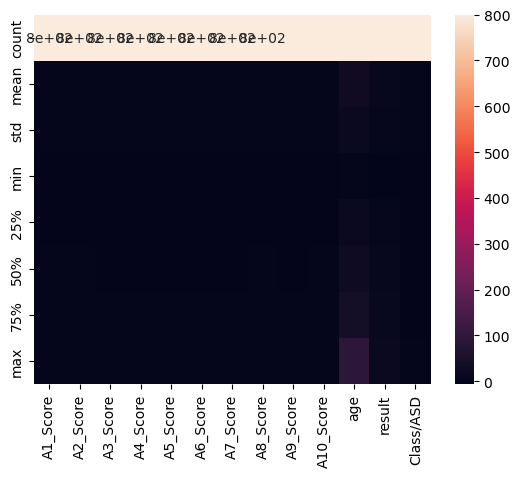

In [69]:
sns.heatmap(num_col,annot=True)

In [70]:
from sklearn.preprocessing import OrdinalEncoder
for column in cat_col:
    o_incoder = OrdinalEncoder()
    df[[column]] = o_incoder.fit_transform(df[[column]])

In [71]:
df.head(1)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0.0,5.0,0.0,0.0,7.0,0.0,6.351166,4.0,0


In [72]:
X= df.drop(['Class/ASD'],axis=1)
y=df['Class/ASD']

In [73]:
X.head(1)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,0,1,0,1,0,1,0,1,1,38.172746,0.0,5.0,0.0,0.0,7.0,0.0,6.351166,4.0


In [75]:
y.head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Class/ASD, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((640, 19), (160, 19), (640,), (160,))

In [77]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [81]:
logistic_model = lg.fit(X_train,y_train)
logistic_model

LogisticRegression()

In [82]:
ytrain_pred=logistic_model.predict(X_train)
ytest_pred = logistic_model.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score
ytrain_score = lg.score(X_train,y_train)
ytest_score = lg.score(X_test,y_test)
print('training score= ',ytrain_score,'testing score = ',ytest_score)

training score=  0.8640625 testing score =  0.9


In [90]:
from sklearn.metrics import classification_report
y_class_report  = classification_report(ytrain_pred,y_train)
print(y_class_report)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       515
           1       0.65      0.67      0.66       125

    accuracy                           0.86       640
   macro avg       0.78      0.79      0.79       640
weighted avg       0.87      0.86      0.87       640



In [91]:
y_class_report_test  = classification_report(ytest_pred,y_test)
print(y_class_report_test)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       127
           1       0.77      0.73      0.75        33

    accuracy                           0.90       160
   macro avg       0.85      0.84      0.84       160
weighted avg       0.90      0.90      0.90       160



In [92]:
from sklearn.metrics import confusion_matrix
y_conf_train = confusion_matrix(ytrain_pred,y_train)
print(y_conf_train)

[[469  46]
 [ 41  84]]


In [117]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression()
param_grid ={"C":[0.01,0.1,1,10,100],
             "penalty":['l1','l2'],
             'solver': ['liblinear', 'saga'],
             'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and model
print("Best Hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Hyperparameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}


In [120]:
# Best parameters after tuning
best_params = grid_search.best_params_

# Retrain the model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=300, penalty='l1', solver='saga')

In [121]:
from sklearn.metrics import accuracy_score
ytrain_score = best_model.score(X_train,y_train)
ytest_score = best_model.score(X_test,y_test)
print('training score= ',ytrain_score,'testing score = ',ytest_score)

training score=  0.859375 testing score =  0.9


In [123]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Predict on test data
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Performance evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test,y_pred_prob))

Accuracy: 0.9
Confusion Matrix:
 [[121   8]
 [  8  23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       129
           1       0.74      0.74      0.74        31

    accuracy                           0.90       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.90      0.90      0.90       160

ROC-AUC Score: 0.9412353088272067


In [93]:
input_dim = X.shape[1]

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [128]:
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(1, activation = 'sigmoid'))

In [129]:
# compiling model
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [130]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 8)                   │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 211 (844.00 B)

 Trainable params: 211 (844.00 B)

 Non-trainable params: 0 (0.00 B)

In [133]:
result = model.fit(X_train,y_train, epochs = 50, batch_size = 10)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8435 - loss: 0.3018
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8398 - loss: 0.3009
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8294 - loss: 0.3127
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8547 - loss: 0.2795
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - loss: 0.2713
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8754 - loss: 0.2585
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8761 - loss: 0.2671
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8522 - loss: 0.2993
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8634 - loss: 0.2931
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8516 - loss: 0.2874
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8782 - loss: 0.2969
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8687 - lo

In [134]:
acc = result.history['accuracy']
loss = result.history['loss']

epoch = [i + 1 for i in range(len(acc))]

In [135]:
acc_loss_df = pd.DataFrame({"Accuracy" : acc,
                            "Loss" : loss,
                            "Epoch" : epoch})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Accuracy','Loss'])

,Accuracy,Loss,Epoch
0,0.854688,0.286773,1
1,0.856250,0.284795,2
2,0.846875,0.287617,3
3,0.853125,0.283798,4
4,0.867188,0.284923,5
5,0.856250,0.284332,6
6,0.865625,0.282568,7
7,0.862500,0.280230,8
8,0.871875,0.280268,9
9,0.860937,0.282166,10


In [137]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Accuracy'],
                         mode='lines+markers',
                         name='Accuracy'))

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Loss'],
                         mode='lines+markers',
                         name = 'Loss'))

fig.update_layout(title = {'text': "<b>Training Accuracy Vs Training Loss</b>\n",
                           'xanchor': 'center',
                           'yanchor': 'top',
                           'y':0.9,'x':0.5,},
                  xaxis_title="Epoch",
                  yaxis_title = "Accuracy / Loss",
                  title_font = dict(size = 20))

fig.layout.template = 'plotly_dark'

fig.show()